## 1. Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
'''------Reading files------'''
import os

'''------Audio preprocessing------'''
from pydub import AudioSegment

'''------Manipulating data------'''
import numpy as np
from sklearn.preprocessing import LabelEncoder # Numerical encoding

'''------Loading the audio------'''
import librosa
import librosa.display
from IPython import display

## 2. Load Processed Data

In [9]:
dir25_1 = "D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/"
data25_1 = os.listdir(dir25_1)
file_dir25_1 = []
count1 = 0

for mooddir25 in data25_1:
    if(not r'.' in mooddir25):
        moodDirName25 = os.path.join(dir25_1,mooddir25)
        mooddir25=np.array(os.listdir(moodDirName25))
        for audio in mooddir25:
            if(audio[-3:]=='mp3'):
                count1+=1
                fn=os.path.join(moodDirName25,audio)
                file_dir25_1.append(fn)
                print(str(count1),fn)

1 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\adana_kopru_basi_murat_kursun.mp3
2 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\ah_nerede_vah_nerede_fusun_onal.mp3
3 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\altun_kardesler_erik_dali.mp3
4 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\antebin_hamamlar_cesitli_sanatci.mp3
5 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\antebin_kalesine_ibrahim_tatlises.mp3
6 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\arap_kizi_ibrahim_tatlises.mp3
7 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\arpa_bugday_daneler_muazzez_ersoy.mp3
8 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\arzu_kus_adana_kopru_basi.mp3
9 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\askimiz_bitecek_cansu_koc.mp3
10 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\ayas_

In [21]:
dir25_2 = "D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/"
data25_2 = os.listdir(dir25_2)
file_dir25_2 = []
count2 = 0

for mooddir25 in data25_2:
    if(not r'.' in mooddir25):
        moodDirName25 = os.path.join(dir25_2,mooddir25)
        mooddir25=np.array(os.listdir(moodDirName25))
        for audio in mooddir25:
            if(audio[-3:]=='mp3'):
                count2+=1
                fn=os.path.join(moodDirName25,audio)
                file_dir25_2.append(fn)
                print(str(count2),fn)

1 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\adana_kopru_basi_murat_kursun.mp3
2 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\ah_nerede_vah_nerede_fusun_onal.mp3
3 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\altun_kardesler_erik_dali.mp3
4 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\antebin_hamamlar_cesitli_sanatci.mp3
5 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\antebin_kalesine_ibrahim_tatlises.mp3
6 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\arap_kizi_ibrahim_tatlises.mp3
7 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\arpa_bugday_daneler_muazzez_ersoy.mp3
8 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\arzu_kus_adana_kopru_basi.mp3
9 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\askimiz_bitecek_cansu_koc.mp3
10 D:/UM/Project/Mozartify/project/Datasets/audio/trimmed_audio/happy\ayas_

## 3. Feature extraction

In [26]:
def feature2d(file, max_frames=1099):
    try:
        y, sr = librosa.load(file)
    except:
        print('No such file')
        return None, None, None

    # Spectrogram
    stft = librosa.stft(y)
    stft_db = librosa.amplitude_to_db(abs(stft))
    spec = librosa.util.fix_length(stft_db, size=max_frames, axis=1)

    # MFCC
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs = librosa.util.fix_length(mfccs, size=max_frames, axis=1)

    # Mel
    s = librosa.feature.melspectrogram(y=y, sr=sr)
    mel = librosa.amplitude_to_db(s, ref=np.max)
    mel = librosa.util.fix_length(mel, size=max_frames, axis=1)

    return spec, mfccs, mel

n2 = len(file_dir25_1) # num of audio data
spec2 = np.empty([n2, 1025, 1099])
mfccs2 = np.empty([n2, 20, 1099])
mel2 = np.empty([n2, 128, 1099])

# Label the mood
mood2 = []
for i in range(len(file_dir25_1)):
    m = os.path.basename(os.path.dirname(file_dir25_1[i]))
    mood2.append(m)

for i in range(len(file_dir25_1)):
    spec, mfccs, mel = feature2d(file_dir25_1[i])
    if spec is not None:  # Make sure the file was processed correctly
        spec2[i], mfccs2[i], mel2[i] = spec, mfccs, mel


In [27]:
# save memory usage
spec2 = spec2.astype(np.float32)
mfccs2 = mfccs2.astype(np.float32)
mel2 = mel2.astype(np.float32)

## 4. Label Encoding

In [31]:
np.unique(mood2)

array(['happy', 'relax', 'sad'], dtype='<U5')

In [32]:
le = LabelEncoder()
moodtrans2=le.fit(np.array(mood2))
moodtrans2=le.transform(np.array(mood2))
np.unique(moodtrans2)

array([0, 1, 2])

## 5. Save 2D features into npz. file

In [33]:


np.savez_compressed("D:/UM/Project/Mozartify/project/Datasets/Features/Features2D/Features2D.npz", 
                    spec = spec2, 
                    mfcc = mfccs2,
                    mel = mel2,
                    target = moodtrans2)

6. Visualize The Saved .npz file

Keys in the .npz file: KeysView(NpzFile 'D:/UM/Project/Mozartify/project/Datasets/Features/Features2D/Features2D.npz' with keys: spec, mfcc, mel, target)

Visualizing array: spec
Array shape: (973, 1025, 1099)


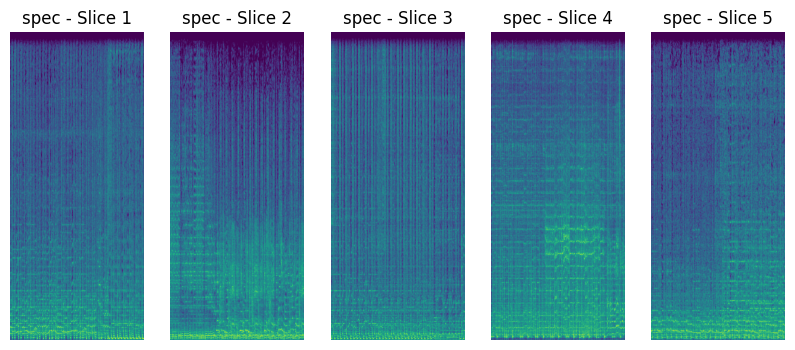


Visualizing array: mfcc
Array shape: (973, 20, 1099)


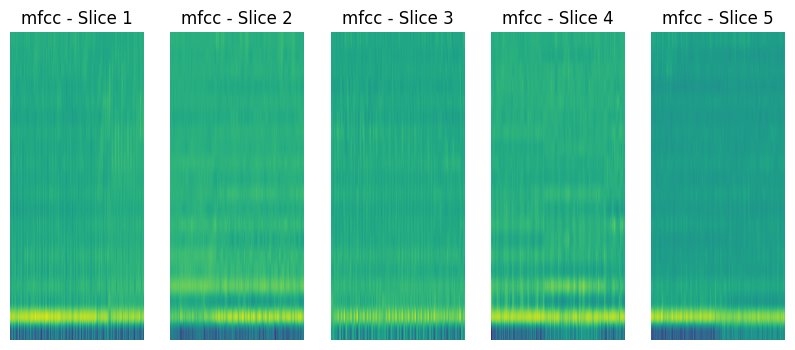


Visualizing array: mel
Array shape: (973, 128, 1099)


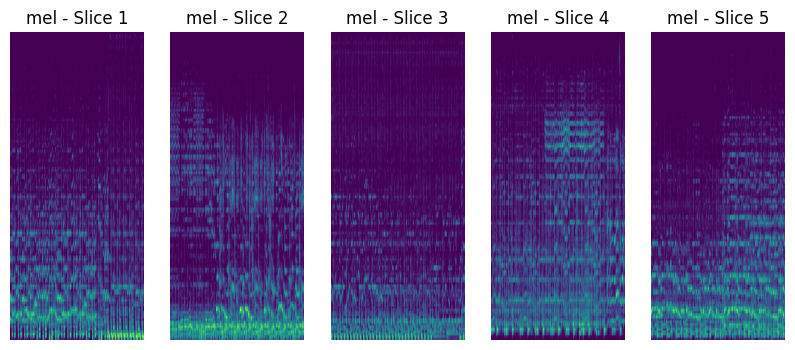


Visualizing array: target
Array shape: (973,)


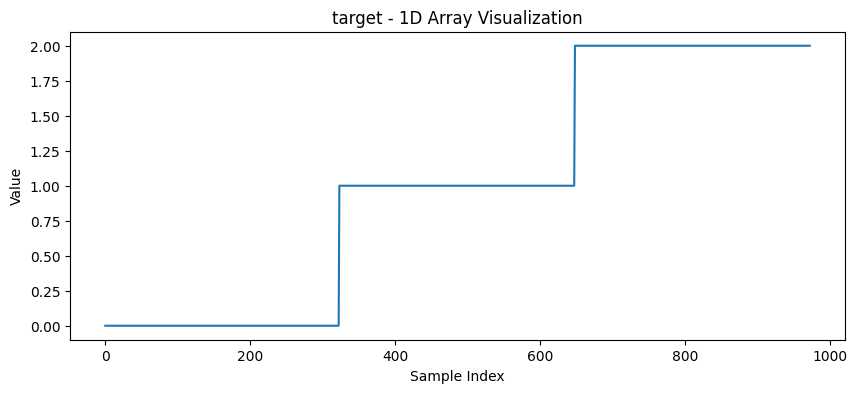

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the .npz file
data = np.load('D:/UM/Project/Mozartify/project/Datasets/Features/Features2D/Features2D.npz')  # Replace 'your_file.npz' with your actual file name

# Step 2: List all arrays stored in the .npz file
print("Keys in the .npz file:", data.keys())

# Step 3: Access and visualize each array
for key in data.keys():
    array = data[key]
    print(f"\nVisualizing array: {key}")
    print("Array shape:", array.shape)

    if array.ndim == 1:
        # For 1D arrays (e.g., signals)
        plt.figure(figsize=(10, 4))
        plt.plot(array)
        plt.title(f"{key} - 1D Array Visualization")
        plt.xlabel('Sample Index')
        plt.ylabel('Value')
        plt.show()
    elif array.ndim == 2:
        # For 2D arrays (e.g., images, spectrograms)
        plt.figure(figsize=(10, 4))
        plt.imshow(array, aspect='auto', origin='lower', cmap='viridis')
        plt.title(f"{key} - 2D Array Visualization")
        plt.colorbar()
        plt.show()
    elif array.ndim == 3:
        # For 3D arrays (e.g., batch of images)
        plt.figure(figsize=(10, 4))
        for i in range(min(5, array.shape[0])):  # Display up to 5 slices
            plt.subplot(1, 5, i+1)
            plt.imshow(array[i], aspect='auto', origin='lower', cmap='viridis')
            plt.title(f"{key} - Slice {i+1}")
            plt.axis('off')
        plt.show()

# Step 4: Close the file (if needed)
data.close()
